In [85]:
# Lo primero que hacemos es importar todas las librerias necesarias.
#importamos librerias para tratamiento de datos
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,}'.format
import re
import math as mat

#importamos librerias la visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [86]:
# Abrimos el dataset y hacemos un chequeo rápido para saber cantidad de registros y miramos la composición del mismo.
filename = "../../dataset/properati.csv"
data = pd.read_csv(filename)

display(data.sample(n=6))
print(f"(Cantidad de Filas, Cantidad de columnas) -> {data.shape}")

Unnamed: 0 operation property_type            place_name  \
60150       60150      sell         house    Esteban Echeverría   
77888       77888      sell         house               Burzaco   
19764       19764      sell         store              Banfield   
55782       55782      sell     apartment               Canning   
60161       60161      sell            PH         Mar del Plata   
21338       21338      sell         house  San Antonio De Padua   

                                 place_with_parent_names country_name  \
60150  |Argentina|Bs.As. G.B.A. Zona Sur|Esteban Eche...    Argentina   
77888  |Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...    Argentina   
19764  |Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...    Argentina   
55782  |Argentina|Bs.As. G.B.A. Zona Sur|Ezeiza|Canning|    Argentina   
60161  |Argentina|Buenos Aires Costa Atlántica|Mar de...    Argentina   
21338  |Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|San ...    Argentina   

                         state_name  geonames_id                  lat-lon  \
60150        Bs.As. G.B.A. Zona Sur  3,434,003.0  -34.8461073,-58.5059258   
77888        Bs.As. G.B.A. Zona Sur  3,435,894.0                      NaN   
19764        Bs.As. G.B.A. Zona Sur  3,436,152.0    -34.743688,-58.411002   
55782        Bs.As. G.B.A. Zona Sur  3,435,719.0  -34.8787046,-58.5037535   
60161  Buenos Aires Costa Atlántica  3,430,863.0  -37.9960224,-57.5738932   
21338      Bs.As. G.B.A. Zona Oeste  3,429,244.0                      NaN   

                      lat  ...  surface_covered_in_m2    price_usd_per_m2  \
60150         -34.8461073  ...                  300.0                 nan   
77888                 nan  ...                    nan                 nan   
19764          -34.743688  ...                   20.0                 nan   
55782 -34.878704600000006  ...                   60.0 1,969.2307692307693   
60161         -37.9960224  ...                   40.0             1,475.0   
21338                 nan  ...                  173.0    594.059405940594   

             price_per_m2  floor  rooms  expenses  \
60150                 nan    nan    nan       nan   
77888                 nan    nan    nan       nan   
19764             4,000.0    nan    nan       nan   
55782  2,133.333333333333    nan    2.0       nan   
60161             1,475.0    nan    nan       nan   
21338 1,040.4624277456646    nan    4.0       nan   

                                           properati_url  \
60150  http://www.properati.com.ar/19yoh_venta_casa_e...   
77888  http://www.properati.com.ar/1atet_venta_casa_b...   
19764  http://www.properati.com.ar/17an6_venta_local_...   
55782  http://www.properati.com.ar/19pm2_venta_depart...   
60161  http://www.properati.com.ar/19yp5_venta_ph_mar...   
21338  http://www.properati.com.ar/17f9c_venta_casa_s...   

                                             description  \
60150  CODIGO:  ubicado en: Ruta 58 km 6 -  Publicado...   
77888  UBICADO EN  LA CALLE ANDRADE Nº 1231 ENTRE CON...   
19764  Corredor Responsable: FRANCISCO D'ATRI - CPMCA...   
55782  Impecable departamento en Condominio La Vieja ...   
60161  CODIGO: 2923-ABC189 ubicado en: ALBERTI Y NEUQ...   
21338  Chalet 4 amb en buen estado sobre av. brown  c...   

                                                   title  \
60150             Importante propiedad en St Thomas Este   
77888                                     Casa - Burzaco   
19764            VENTA LOCAL COMERCIAL 45MTS OPORTUNIDAD   
55782  Impecable depto en Condominio La Vieja Estacin...   
60161                                          VENDO PH    
21338  Chalet en Venta San Antonio de Padua / Merlo (...   

                                         image_thumbnail  
60150  https://thumbs4.properati.com/7/w50ZmNRloGmNLg...  
77888  https://thumbs4.properati.com/1/03LVePpNRn3fZU...  
19764  https://thumbs4.properati.com/4/saEu8BB7iMwvdz...  
55782  https://thumbs4.properati.com/2/M7v-qMpWST-fOE...  
60161  https://

(Cantidad de Filas, Cantidad de columnas) -> (121220, 26)


In [87]:
# Columna price_usd_per_m2 : revisamos que opciones tiene, o si se repite lo mismo.
print(f'Cantidad de registros con NaN: {data.price_usd_per_m2.isnull().sum()}')
print(f'Porcentaje de registros con NaN: {data.price_usd_per_m2.isnull().mean()*100}')
print("Contamos cantidad de registros unicos:")
print(data.groupby(['price_usd_per_m2']).size().reset_index(name='count'))

Cantidad de registros con NaN: 52603
Porcentaje de registros con NaN: 43.394654347467416
Contamos cantidad de registros unicos:
         price_usd_per_m2  count
0                     0.6      1
1                     1.0      1
2      1.1845710280373831      1
3      1.2369857009345795      1
4      1.5734420828905418      1
...                   ...    ...
25562  78,533.33333333331      1
25563            80,000.0      1
25564 104,486.11428571428      1
25565 173,826.06666666668      1
25566 206,333.33333333328      1

[25567 rows x 2 columns]


<AxesSubplot:xlabel='state_name'>

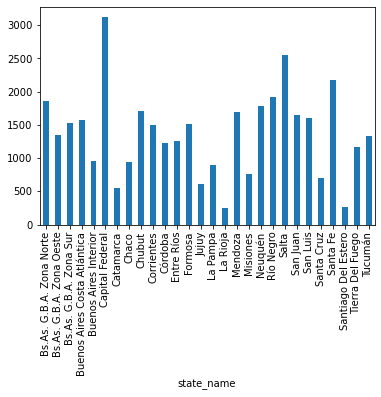

In [88]:
#graficamos el dato por Estado con el fin de observar los rangos de precios en dolares por metro cuadrado
#En esta grafica podemos observar la variación en la media de las areas que existen de acuerdo al Estado.
data.groupby('state_name')['price_usd_per_m2'].mean().plot.bar()

In [92]:
# Al visualizar esta grafica podemos observar como en esta columna existen valores extremos con 
# un apartamento ubicado en la latitud -34.6222 y lon -58.41609 con un valor  de u$d206.000,
import plotly.express as px
fig = px.scatter_3d(data, x='lat', y='lon', z='price_usd_per_m2',
                    color='property_type')
fig.show()

In [93]:
data.price_usd_per_m2.describe()

count              68,617.0
mean     2,160.086915888256
std     2,759.2886214684504
min                     0.6
25%     1,218.1818181818182
50%                 1,800.0
75%     2,486.4117647058824
max     206,333.33333333328
Name: price_usd_per_m2, dtype: float64

Detalle de análisis de columnas:
* `price_usd_per_m2` -> Esta columna tiene 52.603 datos nulos o su equivalente 43.39%. Consideramos que esta variable es relevante para la proyección, por esta razón consideramos que podriamos completarla realizando diferentes operaciones:
1. Rellenando el valor de la columna con la mediana de los precios por metro por place name

Empleamos la mediana para que los datos no se vean afectados por los valores extremos.

### Detalle de valores extremos en la  columna `price_usd_per_m2`:

En el catplot elaborado para esta variable comparada por tipo de propiedad podemos observar 6 datos que se alejan significativamente de la media principalmente en el tipo de propiedad apartamentos.

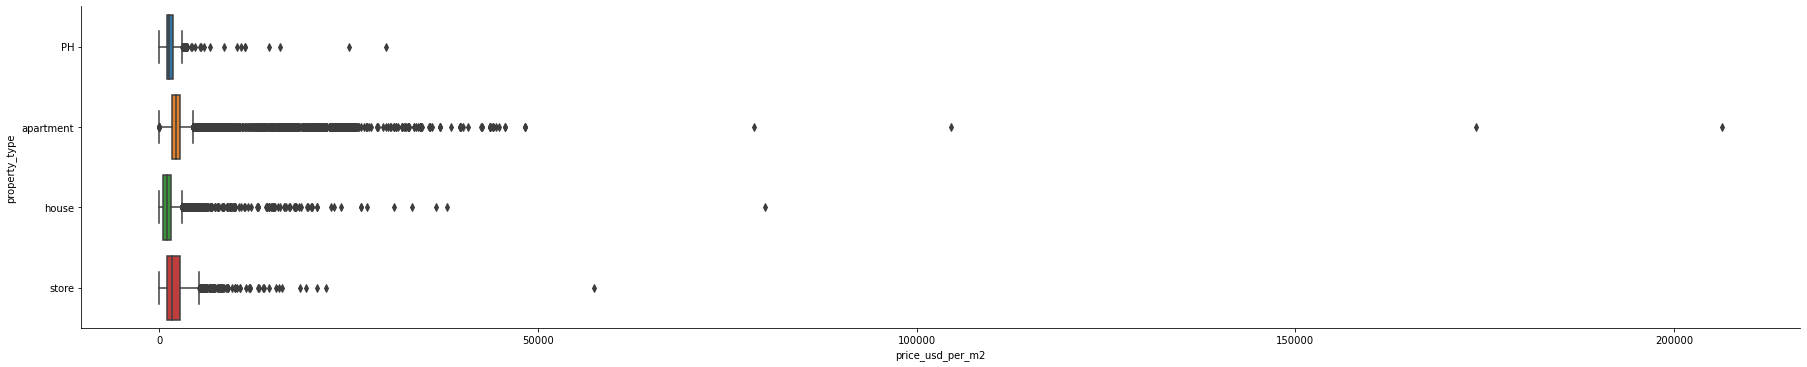

In [95]:
sns.catplot(data=data, x= 'price_usd_per_m2', y="property_type", kind="box", height=5, aspect=5,)


### Completar la columna `price_usd_per_m2` con la mediana por place name:

Hemos decidido emplear la mediana teniendo en cuenta que en los datos se encuentran valores extremos significativos que podrian afectar la proyección de los datos.

In [105]:


#vamos a extraer la mediana de el precio por m2 en dolares por place name

mediana_precio_usd_place_name = data.groupby('place_name').price_usd_per_m2.median()

mediana_precio_usd_place_name.head()

place_name
 Country Maschwitz Club   1,369.9867197875164
 los alamos                           1,600.0
9 de Abril                 137.91763791763793
Abasto                     2,133.333333333333
Abril Club de Campo       1,418.1818181818182
Name: price_usd_per_m2, dtype: float64

In [106]:
print(type(mediana_precio_usd_place_name))

<class 'pandas.core.series.Series'>


In [107]:
mediana_precio_usd_place_name.index

Index([' Country Maschwitz Club', ' los alamos', '9 de Abril', 'Abasto',
       'Abril Club de Campo', 'Acacias Blancas', 'Acassuso', 'Achiras',
       'Adolfo Alsina', 'Adrogué',
       ...
       'Virreyes', 'Vistalba', 'Wenceslao Escalante', 'Wilde',
       'William Morris', 'Yerba Buena', 'Zelaya', 'Zárate',
       'coordenadas 34.255511', 'Álvarez'],
      dtype='object', name='place_name', length=1060)

In [108]:
mediana_precio_usd_place_name.values

array([1369.98671979, 1600.        ,  137.91763792, ...,   20.63778814,
       1943.46289753,           nan])

In [112]:
#vamos a construir un dataframe con las columnas place_name y price_usd_per_m2

mediana_precio_usd_place_name_df = pd.DataFrame(mediana_precio_place_name)

mediana_precio_usd_place_name_df.head(5)

price_usd_per_m2
place_name                                 
 Country Maschwitz Club 1,369.9867197875164
 los alamos                         1,600.0
9 de Abril               137.91763791763793
Abasto                   2,133.333333333333
Abril Club de Campo     1,418.1818181818182

In [113]:
#vamos a resetear el indice para que place_name se convierta en columna

mediana_precio_usd_place_name_df.reset_index(inplace=True)
mediana_precio_usd_place_name_df.head(5)

place_name    price_usd_per_m2
0   Country Maschwitz Club 1,369.9867197875164
1               los alamos             1,600.0
2               9 de Abril  137.91763791763793
3                   Abasto  2,133.333333333333
4      Abril Club de Campo 1,418.1818181818182

In [102]:
#vamos a crear una columna con los valores de la mediana del precio por m2 en usd para cada place_name
data = data.merge(mediana_precio_usd_place_name_df, on = "place_name", suffixes = ("", "_median"), how = 'left')
data.head(5)


Unnamed: 0 operation property_type place_name  \
0           0      sell            PH  Mataderos   
1           1      sell     apartment   La Plata   
2           2      sell     apartment  Mataderos   
3           3      sell            PH    Liniers   
4           4      sell     apartment     Centro   

                             place_with_parent_names country_name  \
0              |Argentina|Capital Federal|Mataderos|    Argentina   
1        |Argentina|Bs.As. G.B.A. Zona Sur|La Plata|    Argentina   
2              |Argentina|Capital Federal|Mataderos|    Argentina   
3                |Argentina|Capital Federal|Liniers|    Argentina   
4  |Argentina|Buenos Aires Costa Atlántica|Mar de...    Argentina   

                     state_name  geonames_id                  lat-lon  \
0               Capital Federal  3,430,787.0  -34.6618237,-58.5088387   
1        Bs.As. G.B.A. Zona Sur  3,432,039.0  -34.9038831,-57.9643295   
2               Capital Federal  3,430,787.0  -34.6522615,-58.5229825   
3               Capital Federal  3,431,333.0  -34.6477969,-58.5164244   
4  Buenos Aires Costa Atlántica  3,435,548.0  -38.0026256,-57.5494468   

          lat  ...    price_usd_per_m2        price_per_m2 floor  rooms  \
0 -34.6618237  ... 1,127.2727272727273             1,550.0   nan    nan   
1 -34.9038831  ...                 nan                 nan   nan    nan   
2 -34.6522615  ...  1,309.090909090909  1,309.090909090909   nan    nan   
3 -34.6477969  ...                 nan                 nan   nan    nan   
4 -38.0026256  ... 1,828.5714285714291 1,828.5714285714291   nan    nan   

   expenses                                      properati_url  \
0       nan  http://www.properati.com.ar/15bo8_venta_ph_mat...   
1       nan  http://www.properati.com.ar/15bob_venta_depart...   
2       nan  http://www.properati.com.ar/15bod_venta_depart...   
3       nan  http://www.properati.com.ar/15boh_venta_ph_lin...   
4       nan  http://www.properati.com.ar/15bok_venta_depart...   

                                         description  \
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...   
1  Venta de departamento en décimo piso al frente...   
2  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...   
3  PH 3 ambientes con patio. Hay 3 deptos en lote...   
4  DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...   

                                               title  \
0                 2 AMB TIPO CASA SIN EXPENSAS EN PB   
1  VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37   ...   
2           2 AMB 3ER PISO CON ASCENSOR APTO CREDITO   
3                       PH 3 amb. cfte. reciclado      
4  DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...   

                                     image_thumbnail  price_usd_per_m2_median  
0  https://thumbs4.properati.com/8/BluUYiHJLhgIIK...      1,442.3076923076926  
1  https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...      1,608.5858585858587  
2  https://thumbs4.properati.com/5/SXKr34F_IwG3W_...      1,442.3076923076926  
3  https://thumbs4.properati.com/3/DgIfX-85Mog5SP...                  1,875.0  
4  https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...      1,869.5652173913047  

[5 rows x 27 columns]

In [103]:
#vamos a cambiar los nan de la columna price_usd_per_m2 por la mediana calculada para cada place_name

data.price_usd_per_m2.fillna(data.price_usd_per_m2_median, inplace = True)

data.head(5)


Unnamed: 0 operation property_type place_name  \
0           0      sell            PH  Mataderos   
1           1      sell     apartment   La Plata   
2           2      sell     apartment  Mataderos   
3           3      sell            PH    Liniers   
4           4      sell     apartment     Centro   

                             place_with_parent_names country_name  \
0              |Argentina|Capital Federal|Mataderos|    Argentina   
1        |Argentina|Bs.As. G.B.A. Zona Sur|La Plata|    Argentina   
2              |Argentina|Capital Federal|Mataderos|    Argentina   
3                |Argentina|Capital Federal|Liniers|    Argentina   
4  |Argentina|Buenos Aires Costa Atlántica|Mar de...    Argentina   

                     state_name  geonames_id                  lat-lon  \
0               Capital Federal  3,430,787.0  -34.6618237,-58.5088387   
1        Bs.As. G.B.A. Zona Sur  3,432,039.0  -34.9038831,-57.9643295   
2               Capital Federal  3,430,787.0  -34.6522615,-58.5229825   
3               Capital Federal  3,431,333.0  -34.6477969,-58.5164244   
4  Buenos Aires Costa Atlántica  3,435,548.0  -38.0026256,-57.5494468   

          lat  ...    price_usd_per_m2        price_per_m2 floor  rooms  \
0 -34.6618237  ... 1,127.2727272727273             1,550.0   nan    nan   
1 -34.9038831  ... 1,608.5858585858587                 nan   nan    nan   
2 -34.6522615  ...  1,309.090909090909  1,309.090909090909   nan    nan   
3 -34.6477969  ...             1,875.0                 nan   nan    nan   
4 -38.0026256  ... 1,828.5714285714291 1,828.5714285714291   nan    nan   

   expenses                                      properati_url  \
0       nan  http://www.properati.com.ar/15bo8_venta_ph_mat...   
1       nan  http://www.properati.com.ar/15bob_venta_depart...   
2       nan  http://www.properati.com.ar/15bod_venta_depart...   
3       nan  http://www.properati.com.ar/15boh_venta_ph_lin...   
4       nan  http://www.properati.com.ar/15bok_venta_depart...   

                                         description  \
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...   
1  Venta de departamento en décimo piso al frente...   
2  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...   
3  PH 3 ambientes con patio. Hay 3 deptos en lote...   
4  DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...   

                                               title  \
0                 2 AMB TIPO CASA SIN EXPENSAS EN PB   
1  VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37   ...   
2           2 AMB 3ER PISO CON ASCENSOR APTO CREDITO   
3                       PH 3 amb. cfte. reciclado      
4  DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...   

                                     image_thumbnail  price_usd_per_m2_median  
0  https://thumbs4.properati.com/8/BluUYiHJLhgIIK...      1,442.3076923076926  
1  https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...      1,608.5858585858587  
2  https://thumbs4.properati.com/5/SXKr34F_IwG3W_...      1,442.3076923076926  
3  https://thumbs4.properati.com/3/DgIfX-85Mog5SP...                  1,875.0  
4  https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...      1,869.5652173913047  

[5 rows x 27 columns]

In [104]:
#luego de reemplazar los valores por la mediana por place name se logran recucir el porcentaje de nans al pasar del 43.39% al 1.26%.
print (f'% de valores nulos que quedan luego de remplazar por la mediana por place_name: {data.price_usd_per_m2.isna().sum()/data.price_usd_per_m2.shape[0]*100}')
print (f'entradas: {data.price_usd_per_m2.shape[0]}')

% de valores nulos que quedan luego de remplazar por la mediana por place_name: 1.267117637353572
entradas: 121220
